## Problem Set #[3]

MACS 30250, Dr. Evans

Linghui Wu

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.optimize as opt
import scipy.interpolate as intpl

import warnings
warnings.filterwarnings("ignore")

### Question 1

#### (a)

In [2]:
# Set up the parameters
beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)

In [3]:
# Set up the preference shocks and its probabilities
eps_vec = np.array([-1.40, -0.55, 0.00, 0.55, 1.40])
eps_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size = eps_vec.shape[0]

In [4]:
# Define the CRRA utility function
def util_CRRA(W, W_pr, gamma):
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    return util

In [5]:
# Define the negative value function
def neg_V_iid(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps) * util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    return -Vtp1

In [6]:
# Perform value function iteration
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    # Integrate out eps_pr from V_init
    Exp_V = V_init @ eps_prob.reshape((eps_size, 1))
    
    # Interpolate expected value function
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind="cubic", fill_value="extrapolate")
    for eps_ind in range(eps_size):
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10), args=V_args, method="bounded")
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
    print("VF_iter {}: VF_dist is {}.".format(VF_iter, VF_dist))

V_1 = V_new.copy()
psi_1 = psi_mat.copy()

VF_iter 1: VF_dist is 3494.416552492849.
VF_iter 2: VF_dist is 3288.9775602179398.
VF_iter 3: VF_dist is 4368.033199294504.
VF_iter 4: VF_dist is 5171.123172733101.
VF_iter 5: VF_dist is 5690.816865389136.
VF_iter 6: VF_dist is 5962.334129328155.
VF_iter 7: VF_dist is 6029.410863441401.
VF_iter 8: VF_dist is 5938.006359170556.
VF_iter 9: VF_dist is 5728.733568262043.
VF_iter 10: VF_dist is 5436.089591828773.
VF_iter 11: VF_dist is 5088.450567375278.
VF_iter 12: VF_dist is 4708.595711207952.
VF_iter 13: VF_dist is 4314.425870978352.
VF_iter 14: VF_dist is 3919.6529865086823.
VF_iter 15: VF_dist is 3534.453890340005.
VF_iter 16: VF_dist is 3166.0717799094914.
VF_iter 17: VF_dist is 2819.3724059115366.
VF_iter 18: VF_dist is 2497.331372214219.
VF_iter 19: VF_dist is 2201.4557625475145.
VF_iter 20: VF_dist is 1932.1399178953566.
VF_iter 21: VF_dist is 1688.9596638065682.
VF_iter 22: VF_dist is 1470.9108719157662.
VF_iter 23: VF_dist is 1276.5993702275612.
VF_iter 24: VF_dist is 1104.389315

#### (b)

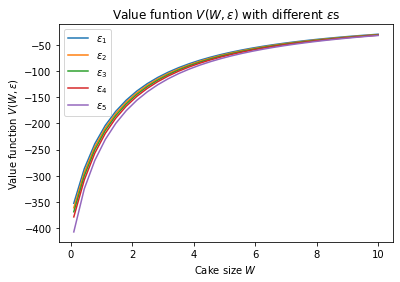

In [7]:
# Plot the resulting value function
plt.plot(W_vec, V_1[:, 0], label=r"$\epsilon_1$")
plt.plot(W_vec, V_1[:, 1], label=r"$\epsilon_2$")
plt.plot(W_vec, V_1[:, 2], label=r"$\epsilon_3$")
plt.plot(W_vec, V_1[:, 3], label=r"$\epsilon_4$")
plt.plot(W_vec, V_1[:, 4], label=r"$\epsilon_5$")
plt.title(r"Value funtion $V(W, \epsilon)$ with different $\epsilon$s")
plt.xlabel(r"Cake size $W$")
plt.ylabel(r"Value function $V(W, \epsilon)$")
plt.legend()
plt.show()

#### (c)

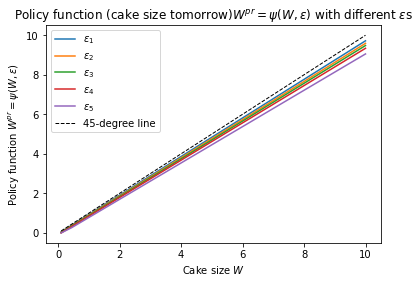

In [8]:
# Plot the resulting policy function
plt.plot(W_vec, psi_1[:, 0], label=r"$\epsilon_1$")
plt.plot(W_vec, psi_1[:, 1], label=r"$\epsilon_2$")
plt.plot(W_vec, psi_1[:, 2], label=r"$\epsilon_3$")
plt.plot(W_vec, psi_1[:, 3], label=r"$\epsilon_4$")
plt.plot(W_vec, psi_1[:, 4], label=r"$\epsilon_5$")
plt.plot(W_vec, W_vec, color="black", lw=1, ls="--", label="45-degree line")
plt.title("Policy function (cake size tomorrow)" + "$W^{pr}=\psi(W,\epsilon)$ with different $\epsilon$s")
plt.xlabel("Cake size $W$")
plt.ylabel("Policy function $W^{pr}=\psi(W,\epsilon)$")
plt.legend()
plt.show()

### Question 2

#### (a)

In [9]:
# Set up the parameters
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)

In [10]:
# Set the preference shocks and its probabilities
trans_mat = np.array([
    [0.40, 0.28, 0.18, 0.10, 0.04],
    [0.20, 0.40, 0.20, 0.13, 0.07],
    [0.10, 0.20, 0.40, 0.20, 0.10],
    [0.07, 0.13, 0.20, 0.40, 0.20],
    [0.04, 0.10, 0.18, 0.28, 0.40]
])

In [11]:
# Perform value function iteration
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    for eps_ind in range(eps_size):
        # Calculate expected value and integrate out epsilon prime
        trans_mat_ind = trans_mat[eps_ind, :]
        Exp_V = V_init @ trans_mat_ind.reshape((eps_size, 1))
        
        # Interpolate expected value function
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind="cubic", fill_value="extrapolate")
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10), args=V_args, method="bounded")
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
        
    VF_dist = ((V_init - V_new) ** 2).sum()
    print("VF_iter {}: VF_dist is {}.".format(VF_iter, VF_dist))

V_2 = V_new.copy()
psi_2 = psi_mat.copy()

VF_iter 1: VF_dist is 3494.416552492849.
VF_iter 2: VF_dist is 4874.985394413625.
VF_iter 3: VF_dist is 5656.12392067181.
VF_iter 4: VF_dist is 6339.326577448594.
VF_iter 5: VF_dist is 6784.60512520715.
VF_iter 6: VF_dist is 6985.799159895715.
VF_iter 7: VF_dist is 6981.428377619099.
VF_iter 8: VF_dist is 6816.840486149343.
VF_iter 9: VF_dist is 6534.059682039727.
VF_iter 10: VF_dist is 6169.1406209651495.
VF_iter 11: VF_dist is 5751.815350888644.
VF_iter 12: VF_dist is 5305.8877157047045.
VF_iter 13: VF_dist is 4849.904814536473.
VF_iter 14: VF_dist is 4397.907932627158.
VF_iter 15: VF_dist is 3960.1652494132745.
VF_iter 16: VF_dist is 3543.8552910466856.
VF_iter 17: VF_dist is 3153.675483893924.
VF_iter 18: VF_dist is 2792.3708357696564.
VF_iter 19: VF_dist is 2461.1834460824566.
VF_iter 20: VF_dist is 2160.226185380022.
VF_iter 21: VF_dist is 1888.7889925601917.
VF_iter 22: VF_dist is 1645.5852440446392.
VF_iter 23: VF_dist is 1428.9469626205291.
VF_iter 24: VF_dist is 1236.97650716

#### (b)

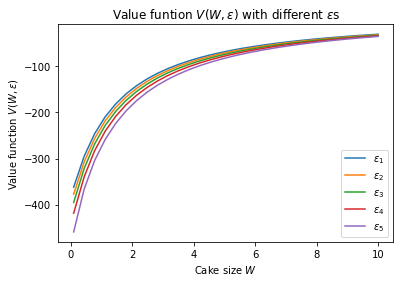

In [12]:
# Plot the resulting value function
plt.plot(W_vec, V_2[:, 0], label=r"$\epsilon_1$")
plt.plot(W_vec, V_2[:, 1], label=r"$\epsilon_2$")
plt.plot(W_vec, V_2[:, 2], label=r"$\epsilon_3$")
plt.plot(W_vec, V_2[:, 3], label=r"$\epsilon_4$")
plt.plot(W_vec, V_2[:, 4], label=r"$\epsilon_5$")
plt.title(r"Value funtion $V(W, \epsilon)$ with different $\epsilon$s")
plt.xlabel(r"Cake size $W$")
plt.ylabel(r"Value function $V(W, \epsilon)$")
plt.legend()
plt.show()

#### (c)

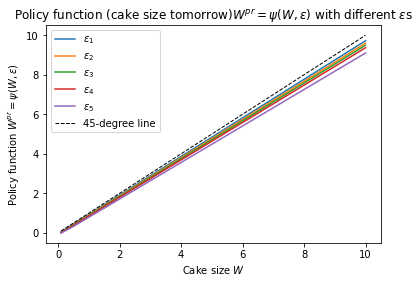

In [13]:
# Plot the resulting policy function
plt.plot(W_vec, psi_2[:, 0], label=r"$\epsilon_1$")
plt.plot(W_vec, psi_2[:, 1], label=r"$\epsilon_2$")
plt.plot(W_vec, psi_2[:, 2], label=r"$\epsilon_3$")
plt.plot(W_vec, psi_2[:, 3], label=r"$\epsilon_4$")
plt.plot(W_vec, psi_2[:, 4], label=r"$\epsilon_5$")
plt.plot(W_vec, W_vec, color="black", lw=1, ls="--", label="45-degree line")
plt.title("Policy function (cake size tomorrow)" + "$W^{pr}=\psi(W,\epsilon)$ with different $\epsilon$s")
plt.xlabel("Cake size $W$")
plt.ylabel("Policy function $W^{pr}=\psi(W,\epsilon)$")
plt.legend()
plt.show()